In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import regex
import unicodedata

from googletrans import Translator
from scipy import stats
from matplotlib.ticker import FormatStrFormatter 


### Описание датасетов:


#### GA_SESSIONS:

- `session_id` — ID визита;
- `client_id` — ID посетителя;
- `visit_date` — дата визита;
- `visit_time` — время визита;
- `visit_number` — порядковый номер визита клиента;
- `utm_source` — канал привлечения;
- `utm_medium` — тип привлечения;
- `utm_campaign` — рекламная кампания;
- `utm_keyword` — ключевое слово;
- `device_category` — тип устройства;
- `device_os` — ОС устройства;
- `device_brand` — марка устройства;
- `device_model` — модель устройства;
- `device_screen_resolution` — разрешение экрана;
- `device_browser` — браузер;
- `geo_country` — страна;
- `geo_city` — город.

In [2]:
df_sessions=pd.read_csv("data/ga_sessions.csv")
df_sessions.head()

C:\Users\Alexandra\AppData\Local\Temp\ipykernel_17576\3224650830.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions=pd.read_csv("data/ga_sessions.csv")


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


#### GA_HITS:

- `session_id` — ID визита;
- `hit_date` — дата события;
- `hit_time` — время события;
- `hit_number` — порядковый номер события в рамках сессии;
- `hit_type` — тип события;
- `hit_referer` — источник события;
- `hit_page_path` — страница события;
- `event_category` — тип действия;
- `event_action` — действие;
- `event_label` — тег действия;
- `event_value` — значение результата действия.

In [3]:
df_hits=pd.read_csv("data/ga_hits-001.csv")
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


Целевая переменная

In [4]:
target_actions = [
    'sub_car_claim_click',
    'sub_car_claim_submit_click',
    'sub_open_dialog_click',
    'sub_custom_question_submit_click',
    'sub_call_number_click',
    'sub_callback_submit_click',
    'sub_submit_success',
    'sub_car_request_submit_click'
]

df_hits["event_value"] = df_hits["event_action"].isin(target_actions).astype(int)

In [5]:
target = df_hits.groupby("session_id")["event_value"].max().reset_index()
df_sessions = df_sessions.merge(target, on="session_id", how="left").fillna({"event_value": 0})

Признаки из ga_hits

In [6]:
#Марка и модель автомобиля
df_sessions[['auto_brand', 'auto_model']] = df_hits['hit_page_path'].str.extract(r'sberauto\.com/cars/all/(\w+)/(\w+)/')

# Data Preparation

Приведение типов

In [7]:
df_sessions["visit_date"] = pd.to_datetime(
    df_sessions["visit_date"], format="%Y-%m-%d"
)
df_sessions['visit_time'] = pd.to_datetime(
    df_sessions['visit_time'], format="%H:%M:%S"
)

In [8]:
#Замена (not set) на NaN
df_sessions.replace(["(not set)"], np.nan, inplace=True)

## Data Cleaning


In [9]:
df_sessions.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 21 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   session_id                1860042 non-null  object        
 1   client_id                 1860042 non-null  object        
 2   visit_date                1860042 non-null  datetime64[ns]
 3   visit_time                1860042 non-null  datetime64[ns]
 4   visit_number              1860042 non-null  int64         
 5   utm_source                1859945 non-null  object        
 6   utm_medium                1859562 non-null  object        
 7   utm_campaign              1640439 non-null  object        
 8   utm_adcontent             1524427 non-null  object        
 9   utm_keyword               777981 non-null   object        
 10  device_category           1860042 non-null  object        
 11  device_os                 789540 non-null   object

In [10]:
duplicates = df_sessions[df_sessions.duplicated()]
duplicates

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_value,auto_brand,auto_model


In [11]:
def print_useful_rows_info(df): 
   print('Количество полностью заполненных объектов из всей выборки:' , len(df.dropna()))
   print('Процент полностью заполненных объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2))

In [12]:
print_useful_rows_info(df_sessions)

Количество полностью заполненных объектов из всей выборки: 1663
Процент полностью заполненных объектов из всей выборки: 0.09


In [13]:
missing_values = (df_sessions.isna().sum()/len(df_sessions)*100).sort_values(ascending=False)
print('Процент пропущенных значений в ga_sessions:')
missing_values

Процент пропущенных значений в ga_sessions:


device_model                99.121633
auto_model                  71.899989
auto_brand                  71.899989
utm_keyword                 58.174009
device_os                   57.552571
device_brand                20.683565
utm_adcontent               18.043410
utm_campaign                11.806346
geo_city                     4.202701
geo_country                  0.061612
utm_medium                   0.025806
utm_source                   0.005215
device_browser               0.000914
device_screen_resolution     0.000430
event_value                  0.000000
session_id                   0.000000
client_id                    0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
device_category              0.000000
dtype: float64

In [14]:
missing_values = (df_hits.isna().sum()/len(df_hits)*100).sort_values(ascending=False)
print('Процент пропущенных значений в ga_hits:')
missing_values

Процент пропущенных значений в ga_hits:


hit_time          58.247795
hit_referer       39.899634
event_label       23.909905
session_id         0.000000
hit_date           0.000000
hit_number         0.000000
hit_type           0.000000
hit_page_path      0.000000
event_category     0.000000
event_action       0.000000
event_value        0.000000
dtype: float64

### Заполнение пропусков

Обработка пропусков device_model

In [15]:
#Количество уникальных значений
df_sessions.device_model.nunique()

104

In [16]:
#Количество пропусков
df_sessions.device_model.isna().sum()

1843704

In [17]:
#Первые 10 строк с пропусками
df_sessions[df_sessions.device_model.isna()][:100]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_value,auto_brand,auto_model
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,1900-01-01 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0.0,NaN,NaN
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,1900-01-01 08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0.0,NaN,NaN
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,1900-01-01 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0.0,volkswagen,polo
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,1900-01-01 05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,...,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0,NaN,NaN
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,1900-01-01 05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,...,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,9055858569671852.1630434476.1630434476,2108481.163043,2021-08-31,1900-01-01 21:00:00,1,ISrKoXQCxqqYvAZICvjs,blogger_stories,BAZCuyHZnaPrMGOMrcCQ,JNHcPlZPxEMWDnRiyoBf,NaN,...,NaN,Apple,NaN,414x896,Safari (in-app),Russia,Moscow,0.0,renault,duster
99,9055865509330223519.1633091999.1633091999,2108482995.163309,2021-10-01,1900-01-01 15:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,nSReTmyFtbSjlPrTKoaX,NaN,NaN,...,NaN,NaN,NaN,1920x1080,Chrome,Russia,Moscow,0.0,skoda,rapid
100,9055870190843841157.1632356999.1632356999,2108484085.163236,2021-09-23,1900-01-01 03:00:00,1,RmEBuqrriAfAVsLQQmhk,cpc,kVOrIKZFrEYGvixPclal,JNHcPlZPxEMWDnRiyoBf,NaN,...,NaN,Samsung,NaN,360x640,Chrome,Russia,Moscow,0.0,renault,logan
101,9055873197324118026.1635526668.1635526668,2108484785.163553,2021-10-29,1900-01-01 19:57:48,1,jaSOmLICuBzCFqHfBdRg,email,bxOTvPtyGSdUrbwoXCPO,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,Windows,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow,0.0,NaN,NaN


In [18]:
#Удаление колонки
df_sessions.drop(["device_model"], axis=1,inplace=True)

In [19]:
print('Новый список колонок')
df_sessions.columns

Новый список колонок


Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country', 'geo_city',
       'event_value', 'auto_brand', 'auto_model'],
      dtype='object')

Обработка пропусков auto_brand

In [20]:
#Количество уникальных значений
df_sessions.auto_brand.nunique()

15

In [21]:
#Количество пропусков
df_sessions.auto_brand.isna().sum()

1337370

In [22]:
#Счетчик уникальных значений
df_sessions.auto_brand.value_counts()

auto_brand
skoda         171258
volkswagen     85933
kia            60168
renault        47199
toyota         28150
nissan         27909
lexus          19914
bmw            18633
haval          16656
volvo          13018
porsche        12371
audi            8080
mini            6678
peugeot         6100
hyundai          605
Name: count, dtype: int64

In [23]:
#Заполнение пропусков "unknown_brand"
df_sessions['auto_brand']=df_sessions['auto_brand'].fillna('unknown_brand')

In [24]:
missing_values_auto_brand = (df_sessions.auto_brand.isna().sum()/len(df_sessions.auto_brand)*100)
print('Процент пропущенных значений auto brand:')
missing_values_auto_brand

Процент пропущенных значений auto brand:


0.0

Обработка пропусков auto_model

In [25]:
#Количество уникальных значений
df_sessions.auto_model.nunique()

43

In [26]:
#Количество пропусков
df_sessions.auto_model.isna().sum()

1337370

In [27]:
#Счетчик уникальных значений
df_sessions.auto_model.value_counts()

auto_model
rapid        93876
polo         65782
karoq        48960
qashqai      27909
rio          26413
duster       23941
logan        23213
octavia      21216
camry        18468
seltos       17508
jolion       16656
sorento      14426
s90          13018
rx           10645
tiguan       10082
nx            9269
cayenne       7306
kodiaq        7206
x3            6981
hatch         6678
touareg       6381
traveller     6100
x5            5431
911           5041
fortuner      4894
a3            4025
x6            3849
alphard       3497
q5            3150
teramont      3137
x7            2372
corolla       1291
soul           981
a4             905
cerato         717
solaris        605
taos           503
sportage       118
passat          48
arkana          45
panamera        21
k5               5
macan            3
Name: count, dtype: int64

In [28]:
#Заполнение пропусков "unknown_model"
df_sessions['auto_model']=df_sessions['auto_model'].fillna('unknown_model')

In [29]:
missing_values_auto_model = (df_sessions.auto_model.isna().sum()/len(df_sessions.auto_model)*100)
print('Процент пропущенных значений auto model:')
missing_values_auto_model

Процент пропущенных значений auto model:


0.0

Обработка пропусков utm_keyword

In [30]:
#Количество уникальных значений
df_sessions.utm_keyword.nunique()

1219

In [31]:
#Количество пропусков
df_sessions.utm_keyword.isna().sum()

1082061

In [32]:
#Счетчик уникальных значений
df_sessions.utm_keyword.value_counts()

utm_keyword
puhZPIYqKXeFPaUviSjo    506819
aXQzDWsJuGXeBXexNHjc     24241
pHqgLcdBQPSLcrTpLkdr     13767
ITfrGJNwVsHBGJMAKoct     13353
hAmNSZmQkKQKAjZEGlgb     11297
                         ...  
XsuVVTgiDIxZtndPjvDm         1
WhaUakldaAmpLumfaADO         1
nJVPLgfxsBtPAXttNVDI         1
nwKBdMZKktIQFvhZwbFe         1
fcXWTQaKfxbkBkBnzLhK         1
Name: count, Length: 1219, dtype: int64

In [33]:
#Первые 10 строк с пустыми utm_keyword
df_sessions[df_sessions.utm_keyword.isna()][:10]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value,auto_brand,auto_model
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,1900-01-01 05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0.0,unknown_brand,unknown_model
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,1900-01-01 05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0.0,unknown_brand,unknown_model
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,1900-01-01 12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,375x812,Safari,Russia,Saint Petersburg,0.0,unknown_brand,unknown_model
7,9055461992850812764.1626107740.1626107740,2108389044.162611,2021-07-12,1900-01-01 19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,360x640,Chrome,Russia,Saint Petersburg,0.0,unknown_brand,unknown_model
9,9055466554104774132.1624800757.1624800757,2108390106.16248,2021-06-27,1900-01-01 16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow,0.0,unknown_brand,unknown_model
10,9055466554104774132.1629442326.1629442326,2108390106.16248,2021-08-20,1900-01-01 09:00:00,2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow,0.0,porsche,911
11,9055469620715506713.1628883994.1628883994,2108390820.162888,2021-08-13,1900-01-01 22:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0.0,nissan,qashqai
12,9055469620715506713.1633110583.1633110583,2108390820.162888,2021-10-01,1900-01-01 20:00:00,2,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0.0,renault,duster
14,9055469620715506713.1636559415.1636559415,2108390820.162888,2021-11-10,1900-01-01 18:50:15,4,SzZERoLMmrEUEhDaYcyN,cpc,NaN,NaN,NaN,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0.0,skoda,rapid
15,9055476398179250925.1634235280.1634235280,2108392398.163424,2021-10-14,1900-01-01 21:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,412x915,Chrome,Russia,Yaroslavl,0.0,skoda,rapid


In [34]:
#Проверка на аномалии, т.е. ловим числа, русские буквы, спецсимволы
df_sessions[df_sessions["utm_keyword"].str.contains(r"[^a-zA-Z\s\-]", na=False)]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value,auto_brand,auto_model


In [35]:
#Заполнение пропусков значением unknown_keyword
df_sessions['utm_keyword']=df_sessions['utm_keyword'].fillna('unknown_keyword')

In [36]:
missing_values_utm_keyword = (df_sessions.utm_keyword.isna().sum()/len(df_sessions.utm_keyword)*100)
print('Процент пропущенных значений в utm_keyword')
missing_values_utm_keyword

Процент пропущенных значений в utm_keyword


0.0

Обработка пропусков device_os

In [37]:
#Количество уникальных значений
df_sessions.device_os.nunique()

12

In [38]:
#Количество уникальных значений
df_sessions.device_os.isna().sum()

1070502

In [39]:
#Счетчик уникальных значений
df_sessions.device_os.value_counts()

device_os
Android          464054
iOS              207104
Windows           88307
Macintosh         24824
Linux              5120
Chrome OS            83
BlackBerry           27
Tizen                 7
Samsung               4
Windows Phone         4
Firefox OS            3
Nokia                 3
Name: count, dtype: int64

In [40]:
#Первые 10 строк с пропусками
df_sessions[df_sessions.device_os.isna()][:10]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value,auto_brand,auto_model
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,1900-01-01 05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,unknown_keyword,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0.0,unknown_brand,unknown_model
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,1900-01-01 05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,unknown_keyword,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0.0,unknown_brand,unknown_model
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,1900-01-01 12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,NaN,Apple,375x812,Safari,Russia,Saint Petersburg,0.0,unknown_brand,unknown_model
7,9055461992850812764.1626107740.1626107740,2108389044.162611,2021-07-12,1900-01-01 19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,NaN,Samsung,360x640,Chrome,Russia,Saint Petersburg,0.0,unknown_brand,unknown_model
9,9055466554104774132.1624800757.1624800757,2108390106.16248,2021-06-27,1900-01-01 16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow,0.0,unknown_brand,unknown_model
10,9055466554104774132.1629442326.1629442326,2108390106.16248,2021-08-20,1900-01-01 09:00:00,2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow,0.0,porsche,911
11,9055469620715506713.1628883994.1628883994,2108390820.162888,2021-08-13,1900-01-01 22:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,NaN,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0.0,nissan,qashqai
12,9055469620715506713.1633110583.1633110583,2108390820.162888,2021-10-01,1900-01-01 20:00:00,2,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,NaN,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0.0,renault,duster
15,9055476398179250925.1634235280.1634235280,2108392398.163424,2021-10-14,1900-01-01 21:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,NaN,Samsung,412x915,Chrome,Russia,Yaroslavl,0.0,skoda,rapid
17,9055487955932503299.1630493885.1630493885,2108395089.163049,2021-09-01,1900-01-01 13:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Mytishchi,0.0,renault,logan


In [41]:
#Заполнение пропусков для телефонов Apple
df_sessions.loc[
    (df_sessions["device_brand"] == "Apple") & 
    (df_sessions["device_category"] == "mobile") & 
    (df_sessions["device_os"].isna()), "device_os"] = "iOS"

In [42]:
#Заполнение пропусков для компьютеров Apple
df_sessions.loc[
    (df_sessions["device_brand"] == "Apple") & 
    (df_sessions["device_category"] == "desktop") & 
    (df_sessions["device_os"].isna()), "device_os"] = "Macintosh"

In [43]:
missing_values_device_os = (df_sessions.device_os.isna().sum()/len(df_sessions.device_os)*100)
print('Процент пропущенных значений в device_os')
missing_values_device_os

Процент пропущенных значений в device_os


39.29588686707074

In [44]:
#Бренды, которые выпускают только Android
android_only_brands = (
    df_sessions.groupby("device_brand")["device_os"]
      .apply(lambda x: set(x.dropna().unique()))
      .loc[lambda s: s == {"Android"}]
      .index
)

In [45]:
android_only_brands

Index(['A1', 'AGM', 'Acer', 'Advan', 'Alcatel', 'Alldocube', 'Amazon',
       'Ananda', 'Archos', 'Ark',
       ...
       'Xgody', 'Xiaomi', 'Yota Devices', 'Yuntab', 'ZOJI', 'ZTE', 'iNew',
       'itel', 'myPhone', 'teXet'],
      dtype='object', name='device_brand', length=155)

In [46]:
#Заполнение пропусков для всех брендов, выпускающих только Android
for i in android_only_brands:
    df_sessions.loc[(df_sessions["device_brand"] == i) & (df_sessions["device_os"].isna()), "device_os"] = "Android"

In [47]:
missing_values_device_os = (df_sessions.device_os.isna().sum()/len(df_sessions.device_os)*100)
print('Процент пропущенных значений в device_os')
missing_values_device_os

Процент пропущенных значений в device_os


23.216465004553662

In [48]:
#Бренды и список их os, для тех, у кого остались пропуски в os
for i in df_sessions.device_brand[df_sessions.device_os.isna()].unique():
    print(i, df_sessions.device_os[df_sessions.device_brand==i].unique())

Samsung ['Android' nan 'Samsung']
Apple ['iOS' nan 'Macintosh']
nan []
Nokia ['Android' nan 'Nokia' 'Windows Phone']
China Phone [nan]
BlackBerry [nan 'Android' 'BlackBerry']
Mozilla ['Android' nan 'Firefox OS']
Flylion [nan]
Itoos [nan]
Walton [nan]
Xiaolajiao [nan]
Condor [nan]
Razer [nan]
Microsoft [nan]
Fujitsu [nan]
PPTV [nan]
RCA [nan]
Cube [nan]
AT&T [nan]
Tonbux [nan]
T-Mobile [nan]
Smartfren [nan]
MTS [nan]
KingSing [nan]
Dragon Touch [nan]
Fero [nan]
Land Rover [nan]
Tanix [nan]
Mlais [nan]
Beelink [nan]
Orbic [nan]
Honeywell [nan]
RED [nan]
Sonim [nan]
Jiayu [nan]
Leegoog [nan]
Star [nan]
Ellipsis [nan]
LTC [nan]
Motive [nan]
M-HORSE [nan]
Winnovo [nan]
Nomi [nan]
Wings Mobile [nan]
How [nan]
Centric [nan]
Maze [nan]
Tagital [nan]
Maxvi [nan]
Opera [nan]


In [49]:
#Счетчик уникальных значений os для брендов, у которых остались пропущенные os
for i in df_sessions.device_brand[df_sessions.device_os.isna()].unique():
    print(i, df_sessions.loc[df_sessions["device_brand"] == i, "device_os"].value_counts(dropna=False))

Samsung device_os
NaN        166510
Android    165680
Samsung         4
Name: count, dtype: int64
Apple device_os
iOS          546641
NaN            4408
Macintosh        39
Name: count, dtype: int64
nan Series([], Name: count, dtype: int64)
Nokia device_os
NaN              3681
Android          3599
Nokia               3
Windows Phone       2
Name: count, dtype: int64
China Phone device_os
NaN    6
Name: count, dtype: int64
BlackBerry device_os
NaN           246
Android        65
BlackBerry     27
Name: count, dtype: int64
Mozilla device_os
NaN           284
Android         8
Firefox OS      3
Name: count, dtype: int64
Flylion device_os
NaN    1
Name: count, dtype: int64
Itoos device_os
NaN    1
Name: count, dtype: int64
Walton device_os
NaN    2
Name: count, dtype: int64
Xiaolajiao device_os
NaN    2
Name: count, dtype: int64
Condor device_os
NaN    7
Name: count, dtype: int64
Razer device_os
NaN    6
Name: count, dtype: int64
Microsoft device_os
NaN    2
Name: count, dtype: int64
Fu

In [50]:
#Заполнение пропусков самой популярной(95% утройств) os для каждого бренда
def fill_os_by_brand(df, brand_col="device_brand", os_col="device_os", threshold=0.95):
    # цикл по брендам
    for brand, group in df.groupby(brand_col):
        # частоты значений ОС (без NaN)
        counts = group[os_col].value_counts(dropna=True)
        
        if len(counts) == 0:
            continue  # если у бренда только NaN → ничего не делаем
        
        # самая частая ОС
        top_os = counts.index[0]
        top_ratio = counts.iloc[0] / counts.sum()
        
        if top_ratio >= threshold:
            # заполняем NaN этой ОС
            df.loc[(df[brand_col] == brand) & (df[os_col].isna()), os_col] = top_os
        else:
            # иначе ставим "unknown_os"
            df.loc[(df[brand_col] == brand) & (df[os_col].isna()), os_col] = "unknown_os"
    
    return df

df_sessions = fill_os_by_brand(df_sessions, threshold=0.95)

In [51]:
missing_values_device_os = (df_sessions.device_os.isna().sum()/len(df_sessions.device_os)*100)
print('Процент пропущенных значений в device_os')
missing_values_device_os

Процент пропущенных значений в device_os


13.801139974258646

In [52]:
#Заполнение оставшихся пропусков "unknown_os"
df_sessions.device_os=df_sessions.device_os.fillna('unknown_os')

In [53]:
missing_values_device_os = (df_sessions.device_os.isna().sum()/len(df_sessions.device_os)*100)
print('Процент пропущенных значений в device_os')
missing_values_device_os

Процент пропущенных значений в device_os


0.0

In [54]:
#Приведение к нижнему регистру
df_sessions['device_os']=df_sessions['device_os'].str.strip().str.lower()

Обработка пропусков device_brand


In [55]:
#Количество уникальных значений 
df_sessions.device_brand.nunique()

204

In [56]:
#Количество пропусков
df_sessions.device_brand.isna().sum()

384723

In [57]:
#Счетчик уникальных значений
df_sessions.device_brand.value_counts()

device_brand
Apple           551088
Samsung         332194
Xiaomi          288367
Huawei          185853
Realme           19058
                 ...  
Itoos                1
Wexler               1
Dragon Touch         1
Smartfren            1
Opera                1
Name: count, Length: 204, dtype: int64

In [58]:
#Первые 10 строк с пропусками
df_sessions[df_sessions.device_brand.isna()][:10]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value,auto_brand,auto_model
28,9055505230298952295.1638478433.1638478433,2108399111.163848,2021-12-02,1900-01-01 23:53:53,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,windows,NaN,1536x864,Chrome,Russia,Balashikha,0.0,renault,logan
63,9055657327967035032.1629707931.1629707931,2108434524.162971,2021-08-23,1900-01-01 11:00:00,1,nSReTmyFtbSjlPrTKoaX,banner,BVKxkCOHKUOvkpbrLMgZ,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,desktop,unknown_os,NaN,1920x1080,YaBrowser,Russia,Moscow,0.0,kia,seltos
64,905565977351442956.1622561294.1622561294,210843509.162256,2021-06-01,1900-01-01 18:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,desktop,unknown_os,NaN,1920x1080,Chrome,Russia,Moscow,0.0,skoda,rapid
67,9055678214400253418.1636965866.1636965866,2108439387.163696,2021-11-15,1900-01-01 11:44:26,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,windows,NaN,1920x1080,Chrome,Russia,Saint Petersburg,0.0,renault,logan
73,9055788191321875859.1626006934.1626006934,2108464993.162601,2021-07-11,1900-01-01 15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,desktop,unknown_os,NaN,1280x720,Chrome,Russia,Moscow,0.0,unknown_brand,unknown_model
74,9055788191321875859.1627377569.1627377569,2108464993.162601,2021-07-27,1900-01-01 12:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,nSReTmyFtbSjlPrTKoaX,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,desktop,unknown_os,NaN,1920x1080,Chrome,Russia,Moscow,0.0,renault,logan
78,9055794766915104430.1624305327.1624305327,2108466524.16243,2021-06-21,1900-01-01 22:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,unknown_keyword,desktop,unknown_os,NaN,834x1112,Safari,Russia,Domodedovo,1.0,skoda,rapid
79,9055795561498027164.1638278300.1638278300,2108466709.163828,2021-11-30,1900-01-01 16:18:20,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,jpZoxCaowxXvglZVUJyq,desktop,windows,NaN,1680x1050,Chrome,Russia,Moscow,0.0,unknown_brand,unknown_model
80,9055795780529779605.1626698645.1626698645,2108466760.16267,2021-07-19,1900-01-01 15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,desktop,unknown_os,NaN,1920x1080,Chrome,Russia,Yoshkar-Ola,0.0,renault,logan
83,9055834796008808950.1622811129.1622811129,2108475844.162281,2021-06-04,1900-01-01 15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,unknown_os,NaN,360x640,Chrome,Russia,Chelyabinsk,0.0,renault,duster


In [59]:
#Заполнение пропусков "unknown_brand"
df_sessions.device_brand = df_sessions.device_brand.fillna("unknown_brand")

In [60]:
missing_values_device_brand = (df_sessions.device_brand.isna().sum()/len(df_sessions.device_brand)*100)
print('Процент пропущенных значений в device_brand')
missing_values_device_brand

Процент пропущенных значений в device_brand


0.0

In [61]:
#Приведение к нижнему регистру
df_sessions['device_brand'] = df_sessions['device_brand'].str.strip().str.lower()

Обработка пропусков utm_adcontent

In [62]:
#Количество уникальных значений
df_sessions.utm_adcontent.nunique()

286

In [63]:
#Количество пропусков
df_sessions.utm_adcontent.isna().sum()

335615

In [64]:
#Счетчик уникальных значений
df_sessions.utm_adcontent.value_counts()

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    1006599
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
LLfCasrxQzJIyuldcuWy      24222
                         ...   
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
WbXQsVOKLOcJrHikuQTZ          1
oJivRDNIrrOckRBIKOtG          1
Name: count, Length: 286, dtype: int64

In [65]:
#Первые 10 строк с пропусками
df_sessions[~df_sessions.utm_adcontent.isna()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value,auto_brand,auto_model
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,1900-01-01 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,android,huawei,360x720,Chrome,Russia,Zlatoust,0.0,unknown_brand,unknown_model
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,1900-01-01 08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,android,samsung,385x854,Samsung Internet,Russia,Moscow,0.0,unknown_brand,unknown_model
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,1900-01-01 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,android,huawei,360x720,Chrome,Russia,Krasnoyarsk,0.0,volkswagen,polo
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,1900-01-01 05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,unknown_keyword,mobile,android,xiaomi,393x786,Chrome,Russia,Moscow,0.0,unknown_brand,unknown_model
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,1900-01-01 12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,ios,apple,375x812,Safari,Russia,Saint Petersburg,0.0,unknown_brand,unknown_model
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860036,9055401700113249881.1639446112.1639446112,2108375006.163945,2021-12-14,1900-01-01 04:41:52,1,ZpYIoDJMcFzVoPFsHGJL,banner,TmThBvoCcwkCZZUWACYq,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,android,zte,360x640,Chrome,Russia,Blagoveshchensk,0.0,unknown_brand,unknown_model
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,1900-01-01 08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,ios,apple,390x844,Safari,Russia,Stavropol,0.0,unknown_brand,unknown_model
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,1900-01-01 15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,ios,apple,375x667,Safari,Russia,Moscow,0.0,unknown_brand,unknown_model
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,1900-01-01 15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,android,xiaomi,393x851,Chrome,Russia,Chelyabinsk,0.0,unknown_brand,unknown_model


In [66]:
#Проверка на аномалии, т.е. поиск числел, русских букв, спецсимволов
df_sessions.utm_adcontent[df_sessions["utm_adcontent"].str.contains(r"[^a-zA-Z\s\-]", na=False)].unique()

array([], dtype=object)

In [67]:
#Заполнение пропусков "unknown_adcontent"
df_sessions.utm_adcontent=df_sessions.utm_adcontent.fillna('unknown_adcontent')

In [68]:
missing_values_utm_adcontent = (df_sessions.utm_adcontent.isna().sum()/len(df_sessions.utm_adcontent)*100)
print('Процент пропущенных значений в utm_adcontent')
missing_values_utm_adcontent

Процент пропущенных значений в utm_adcontent


0.0

Обработка пропусков utm_medium

In [69]:
#Количество уникальных значений
df_sessions.utm_medium.nunique()

55

In [70]:
#Количество пропусков
df_sessions.utm_medium.isna().sum()

480

In [71]:
#Счетчик уникальных значений
df_sessions.utm_medium.value_counts()

utm_medium
banner               552272
cpc                  434794
(none)               300575
cpm                  242083
referral             152050
organic               63034
email                 29240
push                  28035
stories               10582
cpv                    8022
blogger_channel        8015
smartbanner            6794
blogger_stories        4312
cpa                    4279
tg                     4011
app                    2836
post                   2326
smm                    1985
outlook                1332
clicks                  934
blogger_header          771
info_text               343
sms                     239
landing                 134
partner                  97
fb_smm                   66
vk_smm                   65
link                     57
cbaafe                   47
CPM                      40
yandex_cpc               36
ok_smm                   28
static                   22
google_cpc               20
article                  17
nkp      

In [72]:
#Первые 10 строк с пропусками
df_sessions[df_sessions.utm_medium.isna()][:10]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value,auto_brand,auto_model
14028,9117228372811440986.1636426594.1636426594,2122770150.163642,2021-11-09,1900-01-01 05:56:34,1,iNFgfQPqHPBuvGCYtrQE,NaN,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,android,huawei,360x720,Chrome,Russia,Saint Petersburg,0.0,unknown_brand,unknown_model
17049,9130968089155116617.1636081226.1636081226,2125969177.163608,2021-11-05,1900-01-01 06:00:26,1,iNFgfQPqHPBuvGCYtrQE,NaN,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,ios,apple,414x896,Safari,Russia,NaN,0.0,unknown_brand,unknown_model
20218,9144903415488255785.1637263046.1637263046,2129213748.163467,2021-11-18,1900-01-01 22:17:26,3,WeIwsqEbpZGZwhcQktNS,NaN,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,android,oneplus,360x800,Chrome,Russia,Moscow,0.0,toyota,fortuner
20219,9144903415488255785.1637295862.1637295862,2129213748.163467,2021-11-19,1900-01-01 07:24:22,4,WeIwsqEbpZGZwhcQktNS,NaN,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,android,oneplus,360x800,Chrome,Russia,Moscow,0.0,toyota,alphard
23827,9160652639657579968.1637324018.1637324018,2132880650.163636,2021-11-19,1900-01-01 15:13:38,3,VCREhgqUPSUkmfOTvGiW,NaN,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,windows,unknown_brand,1920x1080,Edge,Russia,Moscow,0.0,unknown_brand,unknown_model
28560,9181218635280059808.1638821947.1638821947,2137669044.162848,2021-12-06,1900-01-01 23:19:07,3,WeIwsqEbpZGZwhcQktNS,NaN,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,android,samsung,412x846,Chrome,Russia,Moscow,0.0,unknown_brand,unknown_model
34514,9208226377487956569.1636672826.1636672826,2143957274.163664,2021-11-12,1900-01-01 02:20:26,3,WeIwsqEbpZGZwhcQktNS,NaN,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,android,samsung,360x800,Chrome,Russia,Moscow,0.0,kia,seltos
34749,9209270797570327189.1636745876.1636745876,2144200447.163674,2021-11-12,1900-01-01 22:37:56,1,iNFgfQPqHPBuvGCYtrQE,NaN,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,ios,apple,414x736,Safari,Russia,Moscow,0.0,unknown_brand,unknown_model
37110,9219704132125466072.1636441560.1636441560,2146629647.163644,2021-11-09,1900-01-01 10:06:00,1,iNFgfQPqHPBuvGCYtrQE,NaN,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,ios,apple,390x844,Safari,Russia,Buynaksk,0.0,unknown_brand,unknown_model
43867,948502812665061192.1633427276.1633427276,220840520.163343,2021-10-05,1900-01-01 12:00:00,1,ZpYIoDJMcFzVoPFsHGJL,NaN,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,ios,apple,320x568,Safari,Russia,Tver,0.0,toyota,camry


In [73]:
#Заполнение пропусков самым популярным значением
df_sessions.utm_medium = df_sessions.utm_medium.fillna(df_sessions.utm_medium.mode()[0])

Обработка пропусков utm_campaign

In [74]:
#Количество уникальных значений
df_sessions.utm_campaign.nunique()

412

In [75]:
#Количество пропусков
df_sessions.utm_campaign.isna().sum()

219603

In [76]:
df_sessions['utm_campaign'].value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
gecBYcKZCPMcVYdSSzKP    134042
TmThBvoCcwkCZZUWACYq     26597
                         ...  
cqgnjDbqrtCipVvzhxqa         1
AdtHYglxfCpTpwZeTAuW         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 412, dtype: int64

In [77]:
#Первые 10 строк с пропусками
df_sessions[~df_sessions.utm_campaign.isna()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value,auto_brand,auto_model
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,1900-01-01 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,android,huawei,360x720,Chrome,Russia,Zlatoust,0.0,unknown_brand,unknown_model
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,1900-01-01 08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,android,samsung,385x854,Samsung Internet,Russia,Moscow,0.0,unknown_brand,unknown_model
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,1900-01-01 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,android,huawei,360x720,Chrome,Russia,Krasnoyarsk,0.0,volkswagen,polo
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,1900-01-01 12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,ios,apple,375x812,Safari,Russia,Saint Petersburg,0.0,unknown_brand,unknown_model
6,9055455318486370642.1640843788.1640843788,2108387490.164084,2021-12-30,1900-01-01 08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,android,lenovo,602x1029,YaBrowser,Russia,Saint Petersburg,0.0,unknown_brand,unknown_model
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860036,9055401700113249881.1639446112.1639446112,2108375006.163945,2021-12-14,1900-01-01 04:41:52,1,ZpYIoDJMcFzVoPFsHGJL,banner,TmThBvoCcwkCZZUWACYq,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,android,zte,360x640,Chrome,Russia,Blagoveshchensk,0.0,unknown_brand,unknown_model
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,1900-01-01 08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,unknown_keyword,mobile,ios,apple,390x844,Safari,Russia,Stavropol,0.0,unknown_brand,unknown_model
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,1900-01-01 15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,ios,apple,375x667,Safari,Russia,Moscow,0.0,unknown_brand,unknown_model
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,1900-01-01 15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,android,xiaomi,393x851,Chrome,Russia,Chelyabinsk,0.0,unknown_brand,unknown_model


In [78]:
#Проверка на аномалии, т.е. поиск числел, русских букв, спецсимволов
df_sessions.utm_campaign[df_sessions["utm_campaign"].str.contains(r"[^a-zA-Z\s\-]", na=False)].unique()

array([], dtype=object)

In [79]:
#Заполнение пропусков "unknown_campaign"
df_sessions.utm_campaign=df_sessions.utm_campaign.fillna('unknown_campaign')

In [80]:
missing_values_utm_campaign = (df_sessions.utm_campaign.isna().sum()/len(df_sessions.utm_campaign)*100)
print('Процент пропущенных значений в utm_campaign')
missing_values_utm_campaign

Процент пропущенных значений в utm_campaign


0.0

Обработка пропусков geo_city

In [81]:
#Количество уникальных значений
df_sessions.geo_city.nunique()

2547

In [82]:
#Количество пропусков
df_sessions.geo_city.isna().sum()

78172

In [83]:
#Счетчик уникальных значений
df_sessions.geo_city.value_counts()

geo_city
Moscow              805329
Saint Petersburg    296788
Yekaterinburg        35788
Krasnodar            32243
Kazan                29531
                     ...  
Sherbrooke               1
Albion                   1
Bornheim                 1
Huntley                  1
Sommerda                 1
Name: count, Length: 2547, dtype: int64

In [84]:
#Приведение к нижнему регистру
df_sessions.geo_city = df_sessions.geo_city.str.strip().str.lower()

In [85]:
#Проверка на аномалии, т.е. поиск чисел, русских букв, спецсимволов
df_sessions.geo_city[df_sessions["geo_city"].str.contains(r"[^a-zA-Z\s\-\']", na=False)].unique()

array(['53425', 'хомутово', '75709', 'gorki-2', '83709', '92323', '7668',
       '13403', '59139', '6th of october city', 'st. louis', '24130',
       'тимофеевка', '8756', '61925', 'тарасовка', '9992',
       'halle (saale)', '10th of ramadan city', '9954', '39404', '9635',
       '38402', '2233', '6784', '4697', 'alfredo v. bonfil',
       'stolberg (rhineland)', 'timiskaming, unorganized, east part',
       '86039', '8230', 'st. petersburg', '74565', '7084', 'st. gallen',
       'nabeul\u200e', '88040', '14076', 'grunheide (mark)', '12214',
       '8161', '53405'], dtype=object)

In [86]:
#Функция очистки названий городов
translator = Translator()

# Словарь сокращений
abbr_dict = {
    "st.": "saint",
    "st": "saint",
    "mt.": "mount",
    "mt": "mount",
    "ft.": "fort",
    "ft": "fort",
    "v.": "villa",
    "v": "villa",
    "nbhd.": "neighborhood",
    "nbhd": "neighborhood",
    "pt.": "point",
    "pt": "point",
    "n.": "north",
    "n": "north",
    "s.": "south",
    "s": "south",
    "e.": "east",
    "e": "east",
    "w.": "west",
    "w": "west"
}

def clean_city(city):
    #Если NaN замена на "unknown_city"
    if pd.isna(city):
        return "unknown_city"

    # Убираем спецсимволы типа \u200e
    city = regex.sub(r'\p{C}', '', city)

    # Если строка состоит только из цифр → unknown_city
    if city.strip().isdigit():
        return "unknown_city"

    # Убираем скобки и содержимое внутри
    city = re.sub(r"\s*\(.*?\)", "", city)

    # Если несколько слов через запятую, оставить только первое
    city = city.split(",")[0].strip()

    # Замена сокращений через словарь
    words = city.split()
    words = [abbr_dict.get(w.lower(), w) for w in words]
    city = " ".join(words)

    # Если есть кириллица, перевод через Google Translate
    if re.search(r"[а-яА-Я]", city):
        try:
            city = translator.translate(city, src='ru', dest='en').text
        except:
            pass  # если перевод не удался, оставляем оригинал

    # Убираем лишние пробелы
    city = city.strip()

    return city

df_sessions["geo_city"] = df_sessions["geo_city"].apply(clean_city)

In [87]:
#Проверка на аномалии, т.е. поиск чисел, русских букв, спецсимволов
df_sessions.geo_city[df_sessions["geo_city"].str.contains(r"[^a-zA-Z\s\-\']", na=False)].unique()

array(['unknown_city', 'gorki-2', '6th of october city',
       '10th of ramadan city'], dtype=object)

In [88]:
df_sessions.geo_city.value_counts()

geo_city
moscow                  805329
saint petersburg        296789
unknown_city             78465
yekaterinburg            35788
krasnodar                32243
                         ...  
mandelieu-la napoule         1
bad oldesloe                 1
ricany                       1
vinkovci                     1
pershotravens'k              1
Name: count, Length: 2519, dtype: int64

In [89]:
missing_values_geo_city = (df_sessions.geo_city.isna().sum()/len(df_sessions.geo_city)*100)
print('Процент пропущенных значений в geo_city')
missing_values_geo_city

Процент пропущенных значений в geo_city


0.0

Обработка пропусков geo_country

In [90]:
#Количество уникальных значений
df_sessions.geo_country.nunique()

165

In [91]:
#Количество пропусков
df_sessions.geo_country.isna().sum()

1146

In [92]:
#Счетчик уникальных значений
df_sessions.geo_country.value_counts()

geo_country
Russia                 1800565
United States            11784
Ukraine                   9012
Ireland                   4034
Belarus                   3636
                        ...   
Zambia                       1
Malawi                       1
Réunion                      1
Barbados                     1
Congo - Brazzaville          1
Name: count, Length: 165, dtype: int64

In [93]:
#Проверка на аномалии, т.е. поиск чисел, русских букв, спецсимволов
df_sessions.geo_country[df_sessions["geo_country"].str.contains(r"[^a-zA-Z\s\-\']", na=False)].unique()

array(['Antigua & Barbuda', 'Wallis & Futuna', 'Bosnia & Herzegovina',
       'Myanmar (Burma)', 'Côte d’Ivoire', 'Réunion',
       'Svalbard & Jan Mayen'], dtype=object)

In [94]:
#Удаление диакритики (é -> e, ô -> o, ü -> u)
def remove_diacritics(series):
    return series.astype(str).apply(
        lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8')
    )

df_sessions['geo_country'] = remove_diacritics(df_sessions['geo_country'])

In [95]:
#Заполнение пропусков самым популярным значением
df_sessions.geo_country = df_sessions.geo_country.fillna(df_sessions.geo_country.mode()[0])

In [96]:
missing_values_geo_country = (df_sessions.geo_country.isna().sum()/len(df_sessions.geo_country)*100)
print('Процент пропущенных значений в geo_country')
missing_values_geo_country

Процент пропущенных значений в geo_country


0.0

In [97]:
#Приведение к нижнему регистру
df_sessions.geo_country = df_sessions.geo_country.str.strip().str.lower()

Обработка пропусков utm_source

In [98]:
#Количество пропусков
df_sessions.utm_source.isna().sum()

97

In [99]:
#Счетчик уникальных значений
df_sessions.utm_source.value_counts()

utm_source
ZpYIoDJMcFzVoPFsHGJL    578290
fDLlAcSmythWSCVMvqvL    300575
kjsLglQLzykiRbcDiGcD    266354
MvfHsxITijuriZxsqZqt    186199
BHcvLfOaCWvWTykYqHVe    116320
                         ...  
GYkgJdhSxirUFPHFiYSe         1
WRHPhoRKhKxaenRCLBfo         1
tjKUGseGMhkLEzdCqBRx         1
wpmatvDuiMutnvmNVPJo         1
BellrslNBZQZaIxVFGXJ         1
Name: count, Length: 293, dtype: int64

In [100]:
#Проверка на аномалии, т.е. поиск чисел, русских букв, спецсимволов
df_sessions.utm_source[df_sessions["utm_source"].str.contains(r"[^a-zA-Z\s\-\']", na=False)].unique()

array([], dtype=object)

In [101]:
#Заполнение пропусков самым частым значением
df_sessions.utm_source = df_sessions.utm_source.fillna(df_sessions.utm_source.mode()[0])

In [102]:
missing_values_utm_source = (df_sessions.utm_source.isna().sum()/len(df_sessions.utm_source)*100)
print('Процент пропущенных значений в utm_source')
missing_values_utm_source

Процент пропущенных значений в utm_source


0.0

Обработка пропусков device_browser

In [103]:
#Количество уникальных значений
df_sessions.device_browser.nunique()

56

In [104]:
#Количество пропусков
df_sessions.device_browser.isna().sum()

17

In [105]:
#Счетчик уникальных значений
df_sessions.device_browser.value_counts()

device_browser
Chrome                              1013436
Safari                               478562
YaBrowser                            133311
Safari (in-app)                       69912
Android Webview                       55369
Samsung Internet                      47309
Opera                                 26817
Firefox                               16588
Edge                                  16065
UC Browser                              871
Android Runtime                         392
Mozilla Compatible Agent                362
[FBAN                                   269
Instagram 208.0.0.32.135 Android        140
Instagram 209.0.0.21.119 Android        111
MRCHROME                                 77
Android Browser                          49
Opera Mini                               45
Puffin                                   45
Internet Explorer                        36
Maxthon                                  31
Android                                  22
Instagram 216.1.0

In [106]:
#Функция стандартизации. Удаление версий, точек, скобок, пробелов и тд, приведение к нижнему регистру 
def standart_browser(value):
    if isinstance(value, str):
        val = value.lower()
        # Если строка в формате com.something.something, оставляем только третье слово
        match = re.match(r'^com\.[^.]+\.(.+)$', val)
        if match:
            val = match.group(1)
        # Для остальных многословных названий оставляем только первое слово
        else: val = val.split()[0]
        # удаляем содержимое скобок
        val = re.sub(r'\s*\(.*?\)', '', val)
        # удаляем цифры и версии
        val = re.sub(r'[\d\.\-_:\[\]]+', '', val)    
        val = val.strip()
        return val
        
df_sessions['device_browser'] = df_sessions['device_browser'].apply(standart_browser)

In [107]:
#Счетчик уникальных значений
df_sessions.device_browser.value_counts()

device_browser
chrome        1013436
safari         548474
yabrowser      133311
android         55832
samsung         47309
opera           26862
firefox         16588
edge            16065
uc                871
instagram         396
mozilla           379
fban              269
mrchrome           77
puffin             45
internet           36
maxthon            31
vkclient            8
amazon              7
coc                 6
helloworld          6
seamonkey           4
iron                2
netfront            2
myapp               2
mttd                1
nokiax              1
nokia               1
phantom             1
musically           1
konqueror           1
threads             1
Name: count, dtype: int64

In [108]:
#Замена пропусков самым популярным значением
df_sessions.device_browser = df_sessions.device_browser.fillna(df_sessions.device_browser.mode()[0])

Заполнение пропусков device_screen_resolution

In [109]:
#Количество уникальных значений
df_sessions.device_screen_resolution.nunique()

5038

In [110]:
#Количество пропусков
df_sessions.device_screen_resolution.isna().sum()

8

In [111]:
#Счетчик уникальных значений
df_sessions.device_screen_resolution.value_counts()

device_screen_resolution
414x896      169090
1920x1080    125768
375x812      117944
393x851      115454
375x667       93341
              ...  
2262x1553         1
1097x617          1
421x847           1
1791x1007         1
464x1123          1
Name: count, Length: 5038, dtype: int64

In [112]:
#Проверка на аномалии, т.е. все, что имеет формат НЕ число x число
df_sessions.device_screen_resolution[~df_sessions["device_screen_resolution"].str.contains(r"^\d+x\d+$", na=False)].unique()

array([nan], dtype=object)

In [113]:
#Зполнение пропусков самым популрным значением
df_sessions.device_screen_resolution = df_sessions.device_screen_resolution.fillna(df_sessions.device_screen_resolution.mode()[0])

## Data Visualizatoin

In [114]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 20 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   client_id                 object        
 2   visit_date                datetime64[ns]
 3   visit_time                datetime64[ns]
 4   visit_number              int64         
 5   utm_source                object        
 6   utm_medium                object        
 7   utm_campaign              object        
 8   utm_adcontent             object        
 9   utm_keyword               object        
 10  device_category           object        
 11  device_os                 object        
 12  device_brand              object        
 13  device_screen_resolution  object        
 14  device_browser            object        
 15  geo_country               object        
 16  geo_city                  object        
 17  event_va

In [115]:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     int32  
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 1.2+ GB


In [116]:
session_stats = (
    df_hits[["session_id", "hit_number", "hit_time", "hit_page_path", "event_action"]].copy().dropna(subset=["hit_time"])
    .groupby("session_id")
    .agg(
        hits=("hit_number", "count"),
        duration=("hit_time", "max"),
        uniq_pages=("hit_page_path", "nunique"),
        uniq_events=("event_action", "nunique")
    )
    .reset_index()
    .merge(df_sessions[["session_id", "client_id"]], on="session_id", how="left")
)

# clicks per second
session_stats["clicks_per_sec"] = (
    session_stats["hits"] / (session_stats["duration"] / 1000).clip(lower=1)
)

In [117]:
client_visits = (
    df_sessions.groupby(["client_id", "visit_date"])["session_id"]
    .count()
    .reset_index(name="visits_per_day")
)

In [122]:
def detect_anomalies_iqr(session_stats, client_visits, k=5):
    anomalies = {}

    # clicks per second
    q1, q3 = session_stats["clicks_per_sec"].quantile([0.25, 0.75])
    iqr = q3 - q1
    upper = q3 + k * iqr
    anomalies["clicks_per_sec"] = session_stats.loc[
        session_stats["clicks_per_sec"] > upper, "session_id"
    ]
    print(f"clicks_per_sec: {anomalies['clicks_per_sec'].nunique()}, порог: {upper:.4f}")

    # uniq pages per session
    q1, q3 = session_stats["uniq_pages"].quantile([0.25, 0.75])
    iqr = q3 - q1
    upper = q3 + k * iqr
    anomalies["uniq_pages"] = session_stats.loc[
        session_stats["uniq_pages"] > upper, "session_id"
    ]
    print(f"uniq_pages: {anomalies['uniq_pages'].nunique()}, порог: {upper}")

    # visits per day (по client_id)
    upper = client_visits["visits_per_day"].quantile(0.995)  # 99.5 перцентиль
    anomalous_clients = client_visits.loc[client_visits["visits_per_day"] > upper, "client_id"]
    print(f"visits_per_day (clients): {anomalous_clients.nunique()}, порог: {upper}")

    # Переводим аномальных клиентов → их сессии
    anomalies["visits_per_day"] = session_stats.loc[
        session_stats["client_id"].isin(anomalous_clients), "session_id"
    ]

    # Объединяем все session_id
    fraud_sessions = pd.concat(list(anomalies.values())).unique()
    print(f"Найдено подозрительных сессий: {len(fraud_sessions)}")
    print(f"Процент подозрительных сессий: {(len(fraud_sessions)/len(df_sessions) * 100):.4f}%")


In [123]:
detect_anomalies_iqr(session_stats, client_visits, k=5)

clicks_per_sec: 12102, порог: 5.6557
uniq_pages: 4402, порог: 7.0
visits_per_day (clients): 4418, порог: 5.0
Найдено подозрительных сессий: 34140
Процент подозрительных сессий: 1.8354%


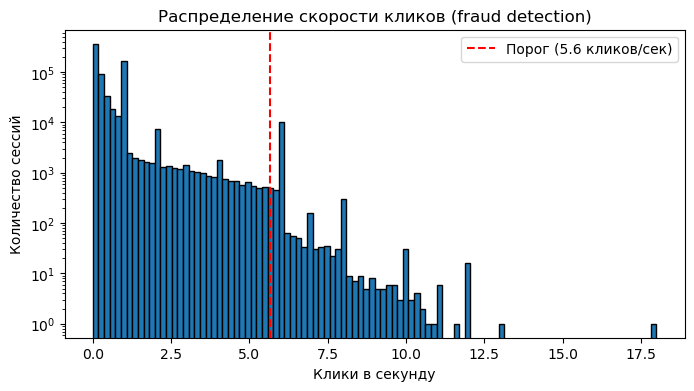

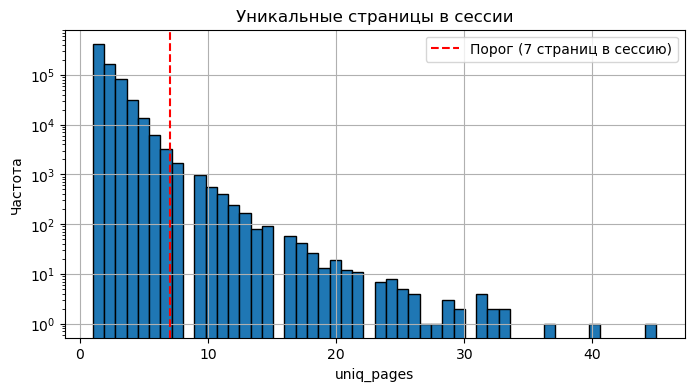

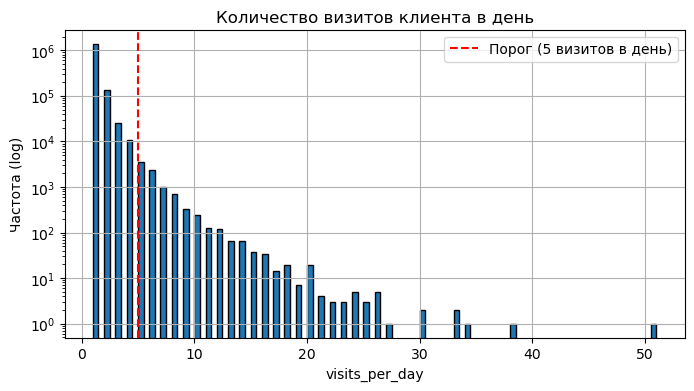

In [124]:
# clicks per second
plt.figure(figsize=(8,4))
plt.hist(session_stats["clicks_per_sec"], edgecolor="black", bins=100, log = True)
plt.axvline(5.6557, color="red", linestyle="--", label="Порог (5.6 кликов/сек)")
plt.xlabel("Клики в секунду")
plt.ylabel("Количество сессий")
plt.title("Распределение скорости кликов (fraud detection)")
plt.legend()
plt.show()

# Уникальные страницы в сессии
plt.figure(figsize=(8,4))
session_stats["uniq_pages"].hist(bins=50, edgecolor="black", log = True)
plt.title("Уникальные страницы в сессии")
plt.axvline(7.0, color="red", linestyle="--", label="Порог (7 страниц в сессию)")
plt.xlabel("uniq_pages")
plt.ylabel("Частота")
plt.legend()
plt.show()

# Визиты клиента за день
plt.figure(figsize=(8,4))
client_visits["visits_per_day"].hist(bins=100, edgecolor="black", log=True)
plt.title("Количество визитов клиента в день")
plt.axvline(5.0, color="red", linestyle="--", label="Порог (5 визитов в день)")
plt.xlabel("visits_per_day")
plt.ylabel("Частота (log)")
plt.legend()
plt.show()


In [125]:
df_sessions = df_sessions[~df_sessions["session_id"].isin(fraud_sessions)]

In [126]:
#Функция вычисления конверсии
def CR(df, group_col):
    cr = df.groupby(group_col)['event_value'].mean()
    return cr

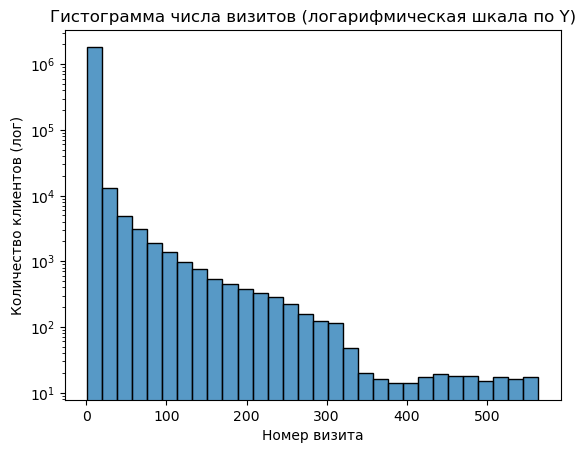

In [127]:
#Количество клиентов в зависимости от номера визита
sns.histplot(df_sessions['visit_number'], bins=30, kde=False)
plt.yscale('log')
plt.title('Гистограмма числа визитов (логарифмическая шкала по Y)')
plt.xlabel('Номер визита')
plt.ylabel('Количество клиентов (лог)')
plt.show()

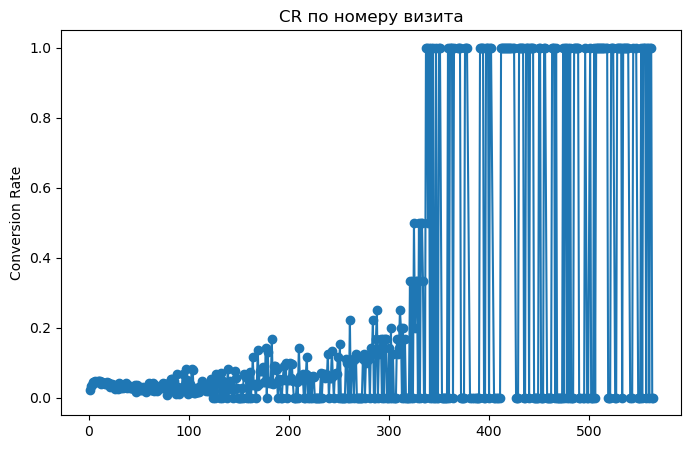

In [128]:
#Конверсия в зависимости от номера визита
cr_visit_number = CR(df_sessions, "visit_number")

plt.figure(figsize=(8,5))
plt.plot(cr_visit_number.index, cr_visit_number.values, marker="o")
plt.ylabel('Conversion Rate')
plt.title('CR по номеру визита')
plt.xticks(rotation=0)
plt.show()

Ступенчатость вызвана малым количеством данных для конкретного номера визита. Наример, для номера визита 400 всего 1 сессия и она оканчивается целевым действием. Для избежания этого нужно разбить количество визитов на бины 

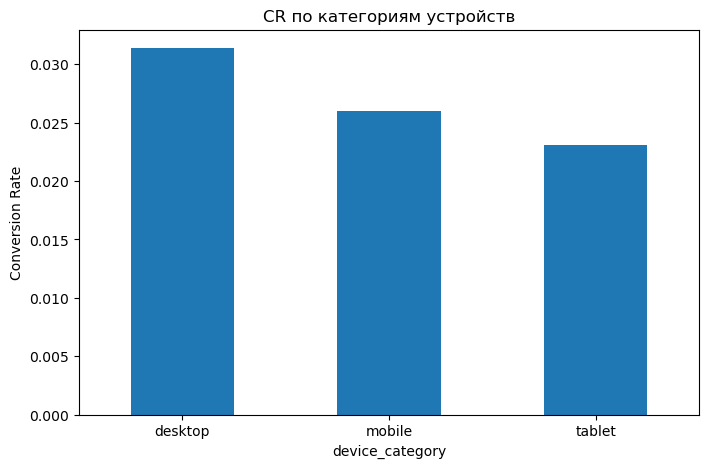

In [129]:
#Конверсия в зависимости от категории устройства
cr_device_category = CR(df_sessions, "device_category")

plt.figure(figsize=(8,5))
cr_device_category.plot(kind='bar')
plt.ylabel('Conversion Rate')
plt.title('CR по категориям устройств')
plt.xticks(rotation=0)
plt.show()

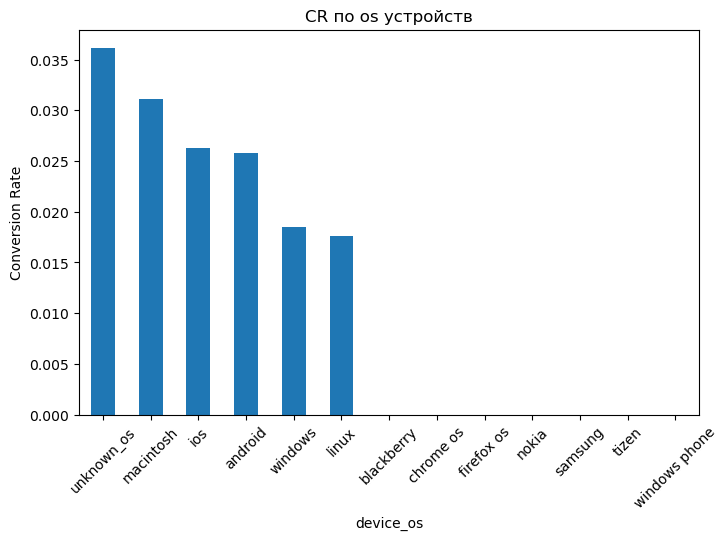

In [130]:
#Конверсия в зависимости от os устройства
cr_device_os = CR(df_sessions, "device_os")

plt.figure(figsize=(8,5))
cr_device_os.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Conversion Rate')
plt.title('CR по os устройств')
plt.xticks(rotation=45)
plt.show()

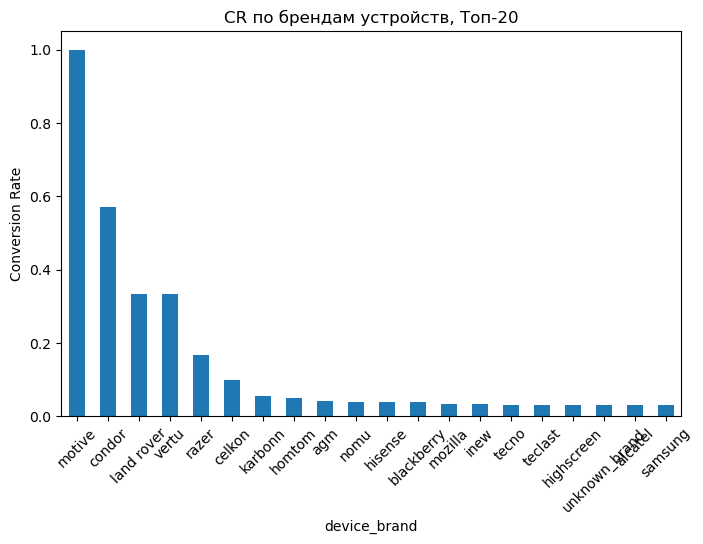

In [131]:
#Конверсия в зависимости от бренда устройства
cr_device_os = CR(df_sessions, "device_brand")

plt.figure(figsize=(8,5))
cr_device_os.sort_values(ascending=False).head(20).plot(kind='bar')
plt.ylabel('Conversion Rate')
plt.title('CR по брендам устройств, Топ-20')
plt.xticks(rotation=45)
plt.show()

Высокая конверсия первых 4-5 брендов вызвана малым количеством данных. Т.е., например, была всего одна сессия с устройства motive и она закончилась целевым действием => конверсия = 1. Для избежания этого нужно объединить редкие категории брендов

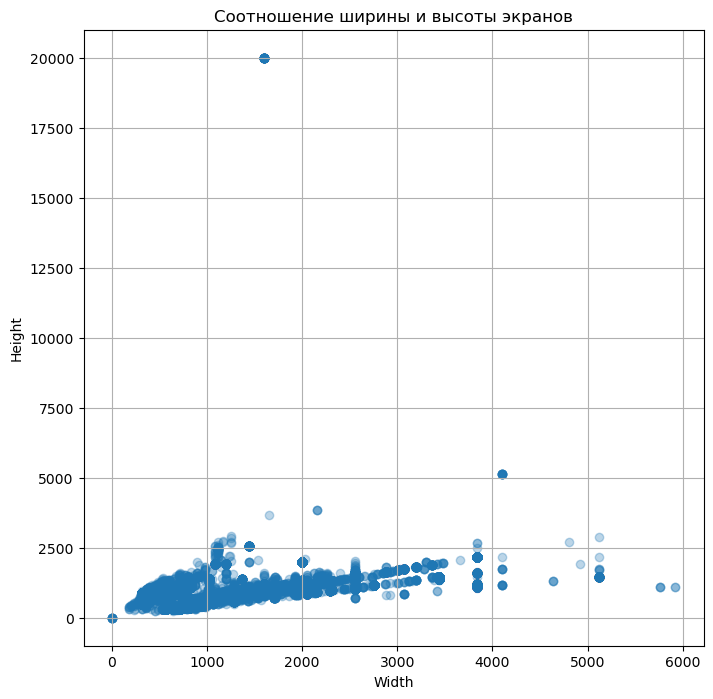

In [132]:
plt.figure(figsize=(8,8))
plt.scatter(df_sessions['device_screen_resolution'].str.split('x', expand=True).astype(float)[0]
            , df_sessions['device_screen_resolution'].str.split('x', expand=True).astype(float)[1], alpha=0.3)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Соотношение ширины и высоты экранов")
plt.grid(True)
plt.show()


Есть явные выбросы. Воспользуемся правилом трех сигм, так как это длиннохвостое распределение, а межквартильный размах слишком чувствителен к выбросам, то есть за выбросы посчитается очень большое количество значений 

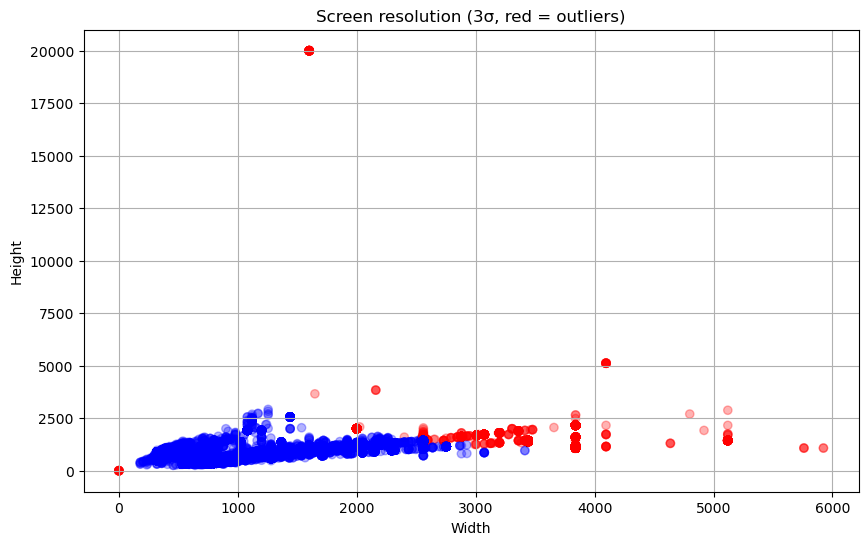

In [133]:
#Получаем ширину и высоту в отдельные массивы
res = df_sessions['device_screen_resolution'].str.split('x', expand=True).astype(float)
width = res[0]
height = res[1]

#Для большей наглядности и индормативности будет логарифмировать площадь
#Вычисляем лог площади
log_area = np.log1p(width * height)

#Z-оценка
is_outlier = np.abs(stats.zscore(log_area)) > 3

#scatter plot с подсветкой выбросов 
plt.figure(figsize=(10,6))
plt.scatter(width, height, c=np.where(is_outlier, 'red', 'blue'), alpha=0.3)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Screen resolution (3σ, red = outliers)")
plt.grid(True)
plt.show()

In [134]:
def delete_outliers(df_sessions, is_outlier):
    for i in df_sessions.device_category.unique():
        mask_outliers = (is_outlier) & (df_sessions['device_category'] == i)
        mask_valid = (~is_outlier) & (df_sessions['device_category'] == i)
        
        most_common = df_sessions.loc[mask_valid, 'device_screen_resolution'].mode()[0]
        df_sessions.loc[mask_outliers, 'device_screen_resolution'] = most_common
    return df_sessions

df_sessions = delete_outliers(df_sessions, is_outlier)

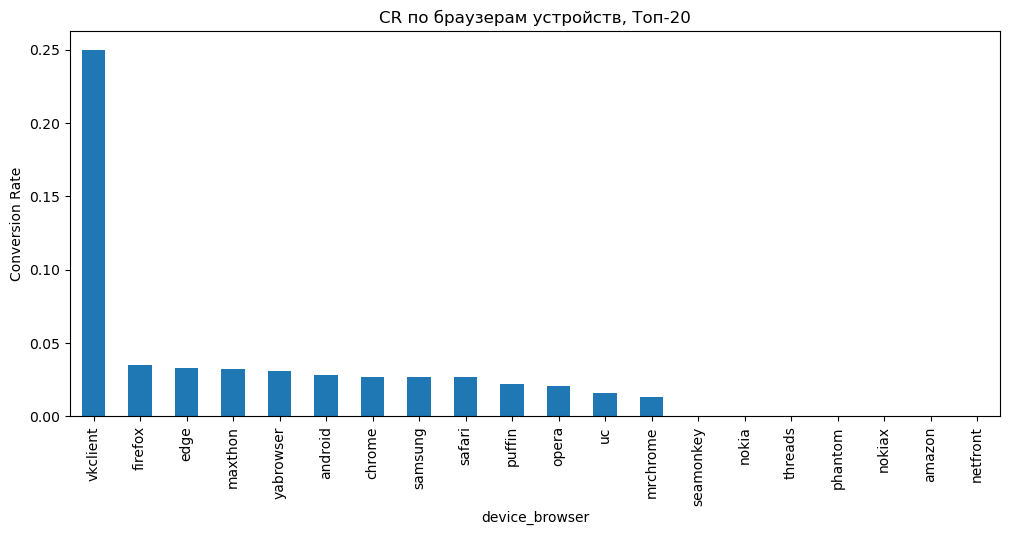

In [135]:
#Конверсия в зависимости от браузера устройства
cr_device_os = CR(df_sessions, "device_browser")

plt.figure(figsize=(12,5))
cr_device_os.sort_values(ascending=False).head(20).plot(kind='bar')
plt.ylabel('Conversion Rate')
plt.title('CR по браузерам устройств, Топ-20')
plt.xticks(rotation=90)
plt.show()

Высокая конверсия vk браузера вызвана малым количеством сессий через него. Для избежания нужно объединить редкие категории браузеров

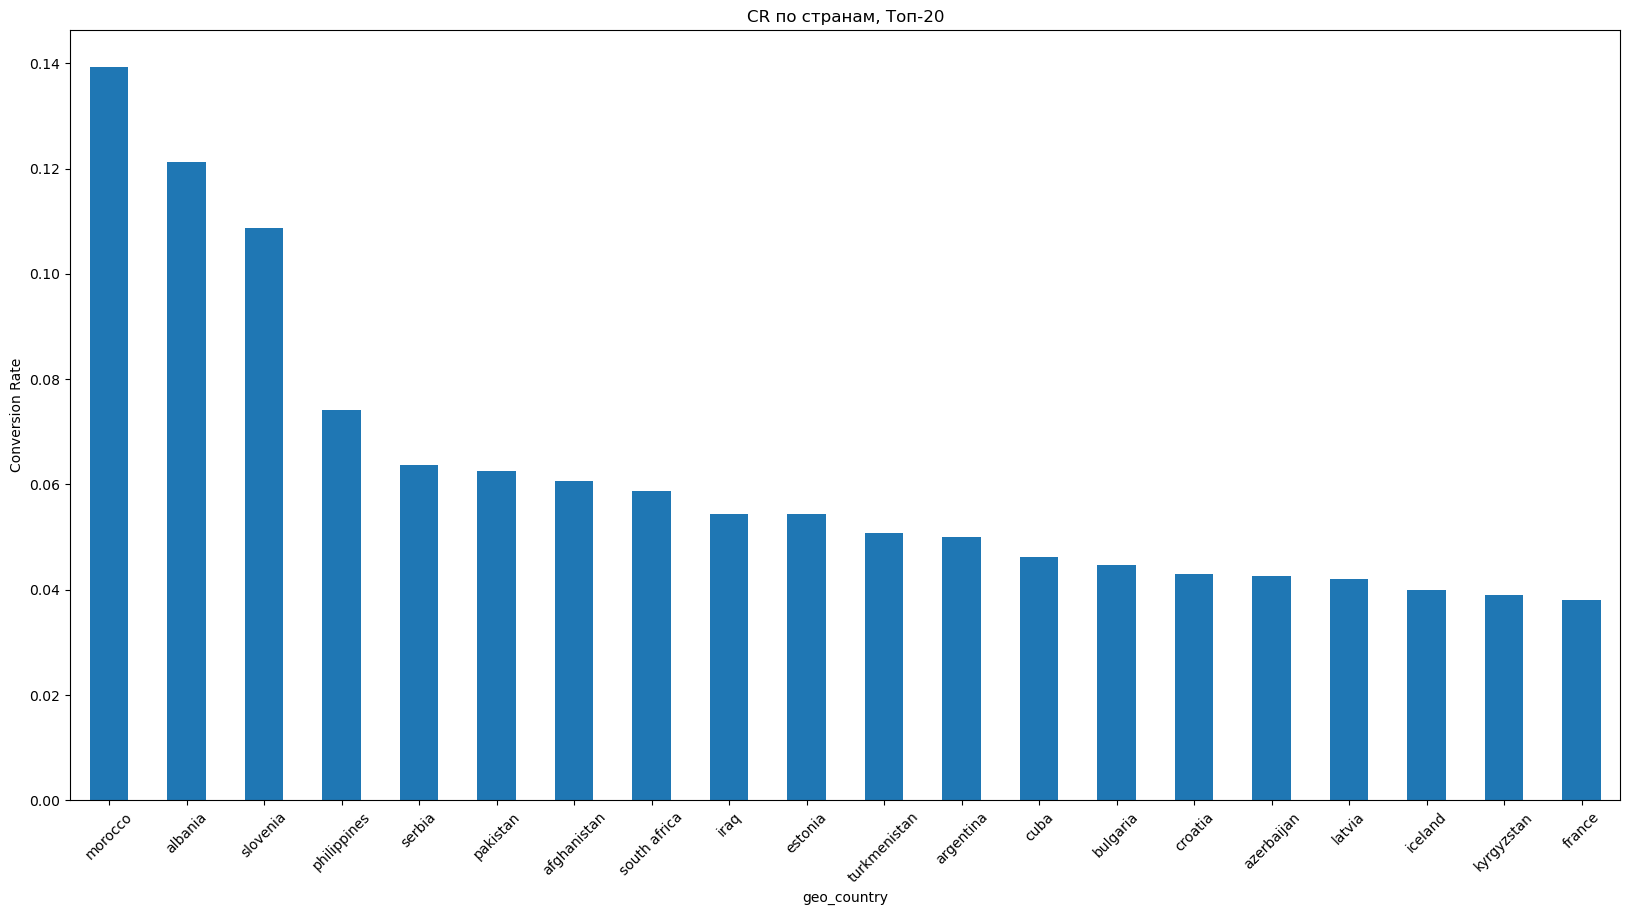

In [136]:
#Конверсия в зависимости от страны
cr_geo_country = CR(df_sessions, "geo_country")

plt.figure(figsize=(20,10))
cr_geo_country.sort_values(ascending=False).head(20).plot(kind='bar')
plt.ylabel('Conversion Rate')
plt.title('CR по странам, Топ-20')
plt.xticks(rotation=45)
plt.show()

Высокая конверсия в 3-4 странах вызвана тем, что количество данных для каждой из них мало. То есть при, например, всего 100 сессий из Марокко 14 могут заканчиваться целевым действием. Для избежания этого нужно объединить редкие категории в одну.

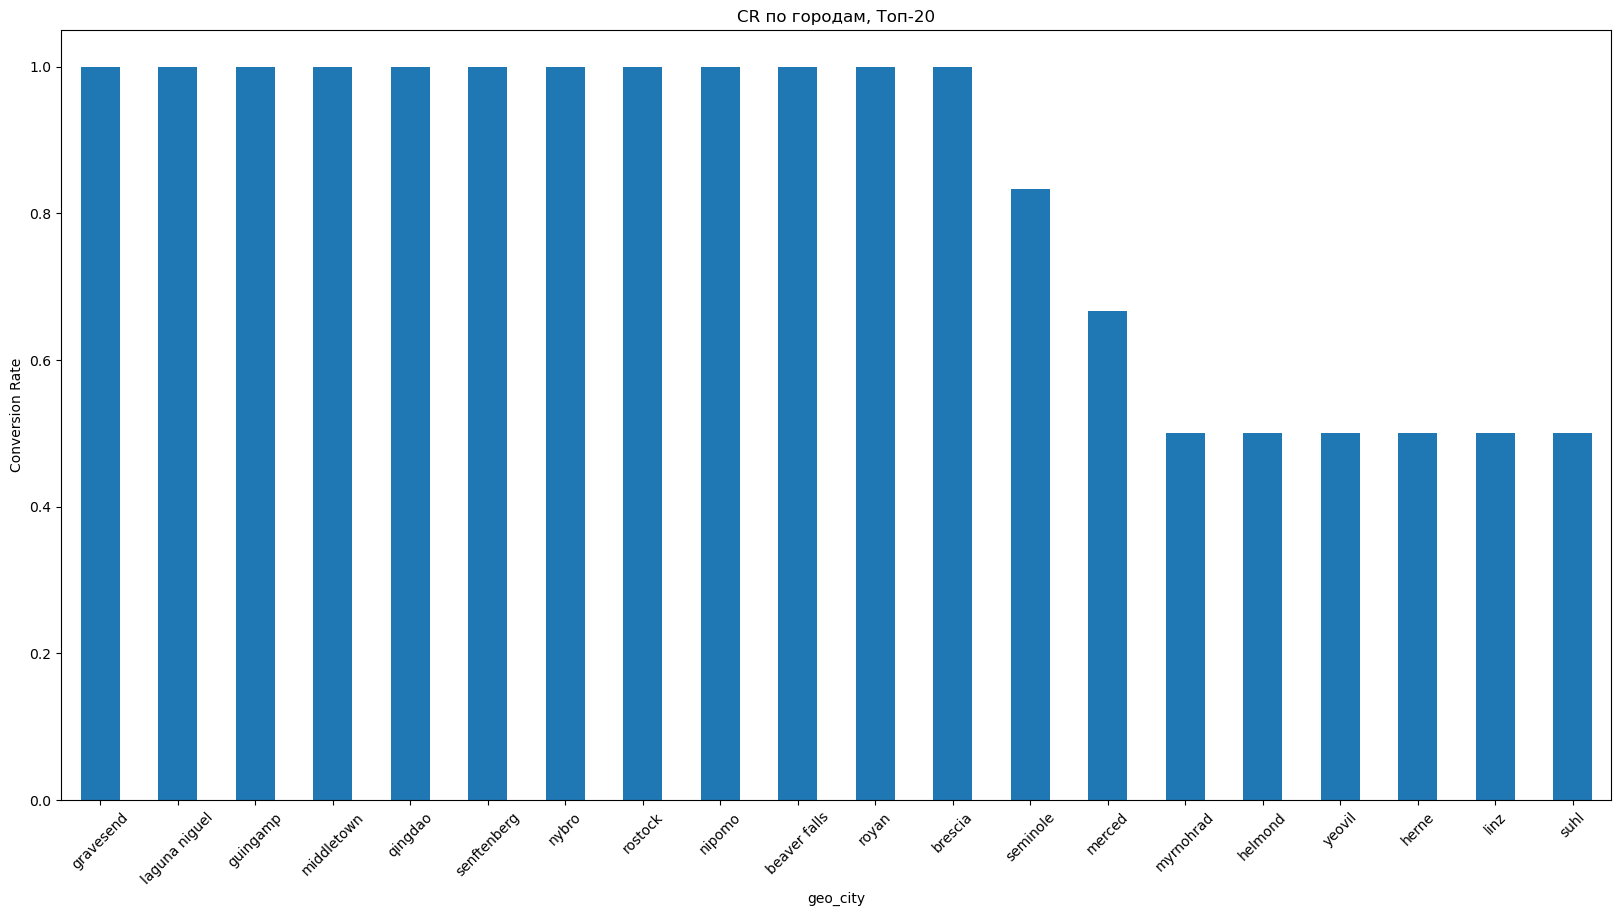

In [137]:
#Конверсия в зависимости от страны
cr_geo_country = CR(df_sessions, "geo_city")

plt.figure(figsize=(20,10))
cr_geo_country.sort_values(ascending=False).head(20).plot(kind='bar')
plt.ylabel('Conversion Rate')
plt.title('CR по городам, Топ-20')
plt.xticks(rotation=45)
plt.show()

Аналогично прошлым случаям, высокая конверсия из-за малого количества сессий из города. Для избежания нужно объединить редкие города в одну группу

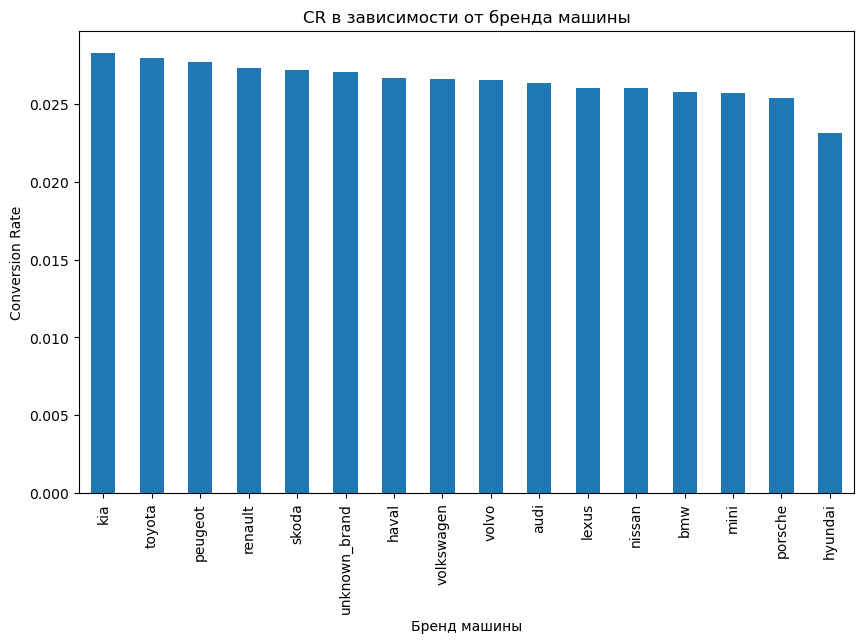

In [138]:
#Конверсия в зависимости от бренда машины
cr_auto_brand = CR(df_sessions, 'auto_brand')

# Строим график
plt.figure(figsize=(10,6))
cr_auto_brand.sort_values(ascending = False).plot(kind="bar")
plt.ylabel("Conversion Rate")
plt.xlabel("Бренд машины")
plt.title("CR в зависимости от бренда машины")
plt.show()

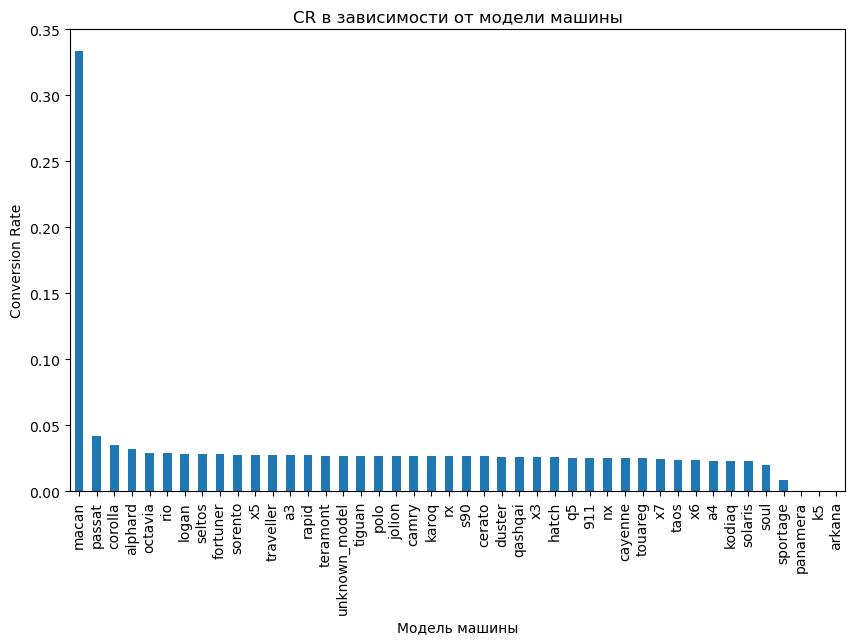

In [139]:
#Конверсия в зависимости от модели машины
cr_auto_model = CR(df_sessions, 'auto_model')

# Строим график
plt.figure(figsize=(10,6))
cr_auto_model.sort_values(ascending = False).plot(kind="bar")
plt.ylabel("Conversion Rate")
plt.xlabel("Модель машины")
plt.title("CR в зависимости от модели машины")
plt.show()

Высокая конверсия модели macan вызвана очень маленьким количеством визитов. Во избежании таких аномалий нужно объединять редкие категории в одну.

In [140]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859938 entries, 0 to 1860041
Data columns (total 20 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   client_id                 object        
 2   visit_date                datetime64[ns]
 3   visit_time                datetime64[ns]
 4   visit_number              int64         
 5   utm_source                object        
 6   utm_medium                object        
 7   utm_campaign              object        
 8   utm_adcontent             object        
 9   utm_keyword               object        
 10  device_category           object        
 11  device_os                 object        
 12  device_brand              object        
 13  device_screen_resolution  object        
 14  device_browser            object        
 15  geo_country               object        
 16  geo_city                  object        
 17  event_value  

In [141]:
# сохранить датафрейм в pkl
df_sessions.to_pickle("data/ga_sessions_clean.pkl")